# Accessing Text Corpora

## Gutenberg Corpus

In [1]:
import nltk
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
from nltk.corpus import gutenberg
emma = gutenberg.words('austen-emma.txt')
len(emma)

192427

In [8]:
emma = nltk.Text(gutenberg.words('austen-emma.txt'))
emma.concordance('surprize')

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

In [10]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


## Web and chat text

In [11]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid,webtext.raw(fileid)[:65],'...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [15]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[:3]

[['now', 'im', 'left', 'with', 'this', 'gay', 'name'], [':P'], ['PART']]

## Brown Corpus
The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University. 

In [24]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [22]:
print(brown.words(categories='news'))
print( brown.sents(categories=['news', 'editorial', 'reviews']))

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]
[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]


In [23]:
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m+':',fdist[m],end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

In [24]:
cfd = nltk.ConditionalFreqDist(
                (genre, word)
                for genre in brown.categories()
                for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


## Reuters Corpus
The Reuters Corpus contains 10,788 news documents totaling 1.3 million words. The documents have been classified into 90 topics, and grouped into two sets, called "training" and "test";

In [27]:
from nltk.corpus import reuters
print(reuters.fileids()[:5])
print(reuters.categories()[:5])

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833']
['acq', 'alum', 'barley', 'bop', 'carcass']


We can ask for the topics covered by one or more documents, or for the documents included in one or more categories.

In [29]:
print(reuters.categories('training/9865'))
print(reuters.categories(['training/9865', 'training/9880']))
print(reuters.fileids('barley')[:5])
print(reuters.fileids(['barley', 'corn'])[:5])

['barley', 'corn', 'grain', 'wheat']
['barley', 'corn', 'grain', 'money-fx', 'wheat']
['test/15618', 'test/15649', 'test/15676', 'test/15728', 'test/15871']
['test/14832', 'test/14858', 'test/15033', 'test/15043', 'test/15106']


In [30]:
print(reuters.words('training/9865')[:10])
print(reuters.words(['training/9865', 'training/9880'])[:10])
print(reuters.words(categories='barley')[:10])
print(reuters.words(categories=['barley', 'corn'])[:10])

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', 'BIDS', 'DETAILED', 'French', 'operators', 'have']
['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', 'BIDS', 'DETAILED', 'French', 'operators', 'have']
['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', 'BIDS', 'DETAILED', 'French', 'operators', 'have']
['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', 'QUARTER', 'Thailand', "'", 's']


## Inaugural Address corpus

In [25]:
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

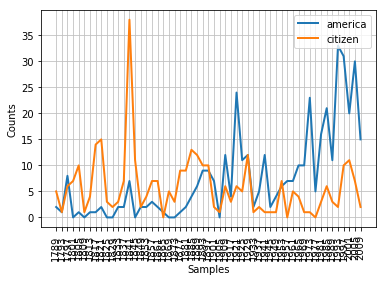

None

In [36]:
from IPython.display import display, Image
cfd = nltk.ConditionalFreqDist(
            (target, fileid[:4])
            for fileid in inaugural.fileids()
            for w in inaugural.words(fileid)
            for target in ['america','citizen']
            if w.lower().startswith(target))
display(cfd.plot())

## Corpora in Other languages

In [38]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [40]:
print(nltk.corpus.cess_esp.words())
print(nltk.corpus.indian.words('hindi.pos'))
print(nltk.corpus.udhr.words('Javanese-Latin1')[11:])

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]
['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]
['Saben', 'umat', 'manungsa', 'lair', 'kanthi', 'hak', ...]


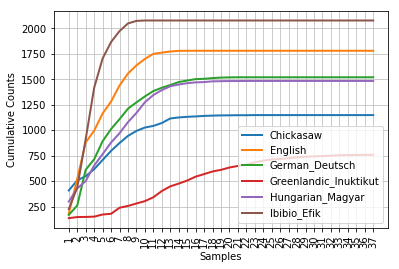

None

In [41]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
            'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
           (lang, len(word))
           for lang in languages
           for word in udhr.words(lang + '-Latin1'))
display(cfd.plot(cumulative=True))

Basic Corpus Functionality defined in NLTK: more documentation can be found using help(nltk.corpus.reader)

|Example|Description|
|-------|-----------|
|fileids()|the files of the corpus|
|fileids([categories])|the files of the corpus corresponding to these categories|
|categories()|the categories of the corpus|
|categories([fileids])|the categories of the corpus corresponding to these files|
|raw()|the raw content of the corpus|
|raw(fileids=[f1,f2,f3])|the raw content of the specified files|
|raw(categories=[c1,c2])|the raw content of the specified categories|
|words()|the words of the whole corpus|
|words(fileids=[f1,f2,f3])|the words of the specified fileids|
|words(categories=[c1,c2])|the words of the specified categories|
|sents()|the sentences of the whole corpus|
|sents(fileids=[f1,f2,f3])|the sentences of the specified fileids|
|sents(categories=[c1,c2])|the sentences of the specified categories|
|abspath(fileid)|the location of the given file on disk|
|encoding(fileid)|the encoding of the file (if known)|
|open(fileid)|open a stream for reading the given corpus file|
|root|if the path to the root of locally installed corpus|
|readme()|the contents of the README file of the corpus|

## Loading your own corpus
If you have your own collection of text files that you would like to access using the above methods, you can easily load them with the help of NLTK's PlaintextCorpusReader.

In [4]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = '/usr/share/dict'
wordlists = PlaintextCorpusReader(corpus_root,'.*')
wordlists.fileids()

['README', 'connectives', 'propernames', 'web2', 'web2a', 'words']

In [5]:
wordlists.words('connectives')

['the', 'of', 'and', 'to', 'a', 'in', 'that', 'is', ...]

**BracketParseCorpusReader** is another method to build corpus. Which is used for corpora that consist of parenthesis-delineated parse trees,
 |  like those found in the "combined" section of the Penn Treebank,
 |  e.g. "(S (NP (DT the) (JJ little) (NN dog)) (VP (VBD barked)))"

In [ ]:
## cannot run cause the wsj corpus is not downlowded
from nltk.corpus import BracketParseCorpusReader
corpus_root = r"C:\corpora\penntreebank\parsed\mrg\wsj" [1]
file_pattern = r".*/wsj_.*\.mrg" [2]
ptb = BracketParseCorpusReader(corpus_root, file_pattern)
ptb.fileids()
['00/wsj_0001.mrg', '00/wsj_0002.mrg', '00/wsj_0003.mrg', '00/wsj_0004.mrg', ...]
len(ptb.sents())
49208
ptb.sents(fileids='20/wsj_2013.mrg')[19]
['The', '55-year-old', 'Mr.', 'Noriega', 'is', "n't", 'as', 'smooth', 'as', 'the',
'shah', 'of', 'Iran', ',', 'as', 'well-born', 'as', 'Nicaragua', "'s", 'Anastasio',
'Somoza', ',', 'as', 'imperial', 'as', 'Ferdinand', 'Marcos', 'of', 'the', 'Philippines',
'or', 'as', 'bloody', 'as', 'Haiti', "'s", 'Baby', Doc', 'Duvalier', '.']

# Conditional Frequency Distributions

In [20]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
            (genre, word)
            for genre in brown.categories()
            for word in brown.words(categories=genre))
print(cfd.conditions())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [22]:
print(cfd['news'])
print(cfd['romance'].most_common(20))

<FreqDist with 14394 samples and 100554 outcomes>
[(',', 3899), ('.', 3736), ('the', 2758), ('and', 1776), ('to', 1502), ('a', 1335), ('of', 1186), ('``', 1045), ("''", 1044), ('was', 993), ('I', 951), ('in', 875), ('he', 702), ('had', 692), ('?', 690), ('her', 651), ('that', 583), ('it', 573), ('his', 559), ('she', 496)]


In [27]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
            'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
           (lang, len(word))
           for lang in languages
           for word in udhr.words(lang + '-Latin1'))
cfd.tabulate(conditions=['English','German_Deutsch'],samples=range(10),cumulative=True)

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


## Generating random text with bigrams

In [28]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven',
   'and', 'the', 'earth', '.']
list(nltk.bigrams(sent))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

In [29]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)
cfd['living']

FreqDist({',': 1,
          '.': 1,
          'creature': 7,
          'soul': 1,
          'substance': 2,
          'thing': 4})

In [31]:
generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land 

**NLTK's Conditional Frequency Distributions:**

|Example|Description|
|-------|-----------|
|cfdist = ConditionalFreqDist(pairs)|create a conditional frequency distribution from a list of pairs|
|cfdist.conditions()|the conditions|
|cfdist[condition]|the frequency distribution for this condition|
|cfdist[condition][sample]|frequency for the given sample for this condition|
|cfdist.tabulate()|tabulate the conditional frequency distribution|
|cfdist.tabulate(samples, conditions)|tabulation limited to the specified samples and conditions|
|cfdist.plot()|graphical plot of the conditional frequency distribution|
|cfdist.plot(samples, conditions)|graphical plot limited to the specified samples and conditions|
|cfdist1 < cfdist2|test if samples in cfdist1 occur less frequently than in cfdist2|


# Lexical Resources
A lexical entry consists of a headword (also known as a lemma) along with additional information such as the part of speech and the sense definition. Two distinct words having the same spelling are called homonyms.

## Wordlist Corpora

In [33]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

print(unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))[:20])
print()
print(unusual_words(nltk.corpus.nps_chat.words())[:20])

['abbeyland', 'abhorred', 'abilities', 'abounded', 'abridgement', 'abused', 'abuses', 'accents', 'accepting', 'accommodations', 'accompanied', 'accounted', 'accounts', 'accustomary', 'aches', 'acknowledging', 'acknowledgment', 'acknowledgments', 'acquaintances', 'acquiesced']

['aaaaaaaaaaaaaaaaa', 'aaahhhh', 'abortions', 'abou', 'abourted', 'abs', 'ack', 'acros', 'actualy', 'adams', 'adds', 'adduser', 'adjusts', 'adoted', 'adreniline', 'ads', 'adults', 'afe', 'affairs', 'affari']


### Stopwords
high-frequency words like the, to and also that we sometimes want to filter out of a document before further processing. Stopwords usually have little lexical content, and their presence in a text fails to distinguish it from other texts.

In [34]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
from nltk.corpus import names
names.fileids()

['female.txt', 'male.txt']

In [39]:
# names can be used for both female and male
male_names = names.words('male.txt')
female_names = names.words('female.txt')
[w for w in male_names if w in female_names]

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel',
 'Ashley',
 'Aubrey',
 'Augustine',
 'Austin',
 'Averil',
 'Barrie',
 'Barry',
 'Beau',
 'Bennie',
 'Benny',
 'Bernie',
 'Bert',
 'Bertie',
 'Bill',
 'Billie',
 'Billy',
 'Blair',
 'Blake',
 'Bo',
 'Bobbie',
 'Bobby',
 'Brandy',
 'Brett',
 'Britt',
 'Brook',
 'Brooke',
 'Brooks',
 'Bryn',
 'Cal',
 'Cam',
 'Cammy',
 'Carey',
 'Carlie',
 'Carlin',
 'Carmine',
 'Carroll',
 'Cary',
 'Caryl',
 'Casey',
 'Cass',
 'Cat',
 'Cecil',
 'Chad',
 'Chris',
 'Chrissy',
 'Christian',
 'Christie',
 'Christy',
 'Clair',
 'Claire',
 'Clare',
 'Claude',
 'Clem',
 'Clemmie',
 'Cody',
 'Connie',
 'Constantine',
 'Corey',
 'Corrie',
 'Cory',
 'Courtney',
 'Cris',
 'Daffy',
 'Dale',
 'Dallas',
 'Dana',
 'Dani',
 'Daniel',
 'Dannie',
 'Danny',
 'Darby',
 'Darcy',
 'Darryl',
 'Daryl',
 'Deane',
 'Del',
 'Dell',
 'Deme

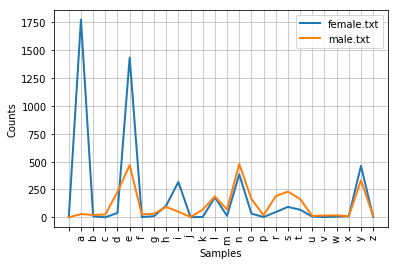

None

In [41]:
# check the ending letter difference of names for female and male
cfd = nltk.ConditionalFreqDist(
           (fileid, name[-1])
           for fileid in names.fileids()
           for name in names.words(fileid))
display(cfd.plot())

## Pronouncing Dictionary
A slightly richer kind of lexical resource is a table (or spreadsheet), containing a word plus some properties in each row. 

In [43]:
entries = nltk.corpus.cmudict.entries()
for entry in entries[50000:50005]:
    print(entry)

('griffon', ['G', 'R', 'IH1', 'F', 'AH0', 'N'])
('griffy', ['G', 'R', 'IH1', 'F', 'IY0'])
('grigas', ['G', 'R', 'AY1', 'G', 'AH0', 'Z'])
('grigg', ['G', 'R', 'IH1', 'G'])
('griggs', ['G', 'R', 'IH1', 'G', 'Z'])


The phones contain digits to represent primary stress (1), secondary stress (2) and no stress (0).

In [46]:
# find words having a particular stress pattern
def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()]
[w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']]

['abbreviated',
 'abbreviated',
 'abbreviating',
 'accelerated',
 'accelerating',
 'accelerator',
 'accelerators',
 'accentuated',
 'accentuating',
 'accommodated',
 'accommodating',
 'accommodative',
 'accumulated',
 'accumulating',
 'accumulative',
 'accumulator',
 'accumulators',
 'accusatory',
 'adenovirus',
 'adjudicated',
 'adjudicating',
 'administrating',
 'administrative',
 'administrator',
 "administrators'",
 "administrator's",
 'administrators',
 'adulterated',
 'adventurism',
 'adventurism',
 'affiliated',
 'affiliated',
 "affiliated's",
 'affiliating',
 'alleviated',
 'alleviated',
 'alleviating',
 'alliteration',
 'alliterative',
 'amalgamated',
 "amalgamated's",
 'amalgamating',
 'ameliorated',
 'ameridata',
 'amoxicillin',
 'anachronism',
 'anachronisms',
 'annihilated',
 'annihilating',
 'antagonism',
 'antagonisms',
 'antagonizing',
 'anticipated',
 'anticipated',
 'anticipating',
 'apologizes',
 'apologizing',
 'apothecary',
 'appreciated',
 'appreciating',
 'apprec

In [49]:
# find p-words with three sounds
p3 = [(pron[0]+'-'+pron[2],word) for (word, pron) in entries 
      if pron[0]=='P' and len(pron)==3]
cfd=nltk.ConditionalFreqDist(p3)
for template in sorted(cfd.conditions()):
    if len(cfd[template]) >10:
        words=sorted(cfd[template])
        wordstring=' '.join(words)
        print(template,wordstring[:70]+'...')

P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pit...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk ...
P-L pahl pail paille pal pale pall paul paule paull peal peale pearl pearl...
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn...
P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour...
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss p...
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piett...
P-UW1 peru peugh pew plew plue prew pru prue prugh pshew pugh...
P-Z p's p.'s p.s pais paiz pao's pas pause paws pays paz peas pease pei's ...


In [56]:
cfd['P-K']

FreqDist({'pac': 1,
          'pack': 1,
          'paek': 1,
          'paik': 1,
          'pak': 1,
          'pake': 1,
          'paque': 1,
          'peak': 1,
          'peake': 1,
          'pech': 1,
          'peck': 1,
          'peek': 1,
          'perc': 1,
          'perk': 1,
          'pic': 1,
          'pick': 1,
          'pik': 1,
          'pike': 1,
          'pique': 1,
          'poch': 1,
          'pock': 1,
          'poke': 1,
          'polk': 1,
          'puck': 1,
          'purk': 1,
          'pyke': 1})

## Comparative Wordlists
Build a toy translator 

In [58]:
from nltk.corpus import swadesh
print(swadesh.fileids())

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']


In [72]:
fr2en = swadesh.entries(['fr','en'])
translate = dict(fr2en)
translate['chien']

'dog'

In [73]:
de2en = swadesh.entries(['de','en'])
es2en = swadesh.entries(['es','en'])
translate.update(dict(de2en))
translate.update(dict(es2en))
print(translate['Hund'])
print(translate['perro'])

dog
dog


# WordNet
WordNet is a semantically-oriented dictionary of English, similar to a traditional thesaurus but with a richer structure. NLTK includes the English WordNet, with 155,287 words and 117,659 synonym sets.

## Seneses and Synonyms
words with same meaning

In [80]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

The entity car.n.01 is called a synset, or "synonym set", a collection of synonymous words (or "lemmas"):

In [83]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [85]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [86]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

In [89]:
print(wn.synset('car.n.01').lemmas())

[Lemma('car.n.01.car'), Lemma('car.n.01.auto'), Lemma('car.n.01.automobile'), Lemma('car.n.01.machine'), Lemma('car.n.01.motorcar')]


In [90]:
print(wn.lemma('car.n.01.car'))

Lemma('car.n.01.car')


In [91]:
print(wn.lemma('car.n.01.car').synset())

Synset('car.n.01')


In [94]:
wn.lemma('car.n.01.automobile').name()

'automobile'

In [95]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [96]:
for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


In [99]:
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

## WordNet Hierarchy

In [102]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms() #下义词
types_of_motorcar 

[Synset('ambulance.n.01'),
 Synset('beach_wagon.n.01'),
 Synset('bus.n.04'),
 Synset('cab.n.03'),
 Synset('compact.n.03'),
 Synset('convertible.n.01'),
 Synset('coupe.n.01'),
 Synset('cruiser.n.01'),
 Synset('electric.n.01'),
 Synset('gas_guzzler.n.01'),
 Synset('hardtop.n.01'),
 Synset('hatchback.n.01'),
 Synset('horseless_carriage.n.01'),
 Synset('hot_rod.n.01'),
 Synset('jeep.n.01'),
 Synset('limousine.n.01'),
 Synset('loaner.n.02'),
 Synset('minicar.n.01'),
 Synset('minivan.n.01'),
 Synset('model_t.n.01'),
 Synset('pace_car.n.01'),
 Synset('racer.n.02'),
 Synset('roadster.n.01'),
 Synset('sedan.n.01'),
 Synset('sport_utility.n.01'),
 Synset('sports_car.n.01'),
 Synset('stanley_steamer.n.01'),
 Synset('stock_car.n.01'),
 Synset('subcompact.n.01'),
 Synset('touring_car.n.01'),
 Synset('used-car.n.01')]

In [106]:
print(sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas()))

['Model_T', 'S.U.V.', 'SUV', 'Stanley_Steamer', 'ambulance', 'beach_waggon', 'beach_wagon', 'bus', 'cab', 'compact', 'compact_car', 'convertible', 'coupe', 'cruiser', 'electric', 'electric_automobile', 'electric_car', 'estate_car', 'gas_guzzler', 'hack', 'hardtop', 'hatchback', 'heap', 'horseless_carriage', 'hot-rod', 'hot_rod', 'jalopy', 'jeep', 'landrover', 'limo', 'limousine', 'loaner', 'minicar', 'minivan', 'pace_car', 'patrol_car', 'phaeton', 'police_car', 'police_cruiser', 'prowl_car', 'race_car', 'racer', 'racing_car', 'roadster', 'runabout', 'saloon', 'secondhand_car', 'sedan', 'sport_car', 'sport_utility', 'sport_utility_vehicle', 'sports_car', 'squad_car', 'station_waggon', 'station_wagon', 'stock_car', 'subcompact', 'subcompact_car', 'taxi', 'taxicab', 'tourer', 'touring_car', 'two-seater', 'used-car', 'waggon', 'wagon']


In [111]:
# hypernyms
print(motorcar.hypernyms())
print()
paths = motorcar.hypernym_paths()
print([synset.name() for synset in paths[0]])
print()
print([synset.name() for synset in paths[1]])

[Synset('motor_vehicle.n.01')]

['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'artifact.n.01', 'instrumentality.n.03', 'container.n.01', 'wheeled_vehicle.n.01', 'self-propelled_vehicle.n.01', 'motor_vehicle.n.01', 'car.n.01']

['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'artifact.n.01', 'instrumentality.n.03', 'conveyance.n.03', 'vehicle.n.01', 'wheeled_vehicle.n.01', 'self-propelled_vehicle.n.01', 'motor_vehicle.n.01', 'car.n.01']


In [113]:
# the most general hypernyms (root hypernyms)
motorcar.root_hypernyms()

[Synset('entity.n.01')]

## Meronyms & Holonyms
meronyms: components of items
holonyms: the things items are contained in

In [115]:
print(wn.synset('tree.n.01').part_meronyms())

[Synset('burl.n.02'), Synset('crown.n.07'), Synset('limb.n.02'), Synset('stump.n.01'), Synset('trunk.n.01')]


In [116]:
print(wn.synset('tree.n.01').substance_meronyms())

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]


In [119]:
print(wn.synset('tree.n.01').member_holonyms())

[Synset('forest.n.01')]


In [121]:
for synset in wn.synsets('mint',wn.NOUN):
    print(synset.name()+":",synset.definition())

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


In [122]:
wn.synset('mint.n.04').part_holonyms()

[Synset('mint.n.02')]

In [123]:
wn.synset('mint.n.04').substance_holonyms()

[Synset('mint.n.05')]

In [124]:
wn.synset('walk.v.01').entailments()

[Synset('step.v.01')]

In [125]:
wn.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

Lexical Relationships between lemma, e.g., antonymy

In [126]:
wn.lemma('supply.n.02.supply').antonyms()

[Lemma('demand.n.02.demand')]

In [127]:
wn.lemma('horizontal.a.01.horizontal').antonyms()

[Lemma('inclined.a.02.inclined'), Lemma('vertical.a.01.vertical')]

In [129]:
print(dir(wn.synset('harmony.n.02')))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_all_hypernyms', '_definition', '_examples', '_frame_ids', '_hypernyms', '_instance_hypernyms', '_iter_hypernym_lists', '_lemma_names', '_lemma_pointers', '_lemmas', '_lexname', '_max_depth', '_min_depth', '_name', '_needs_root', '_offset', '_pointers', '_pos', '_related', '_shortest_hypernym_paths', '_wordnet_corpus_reader', 'also_sees', 'attributes', 'causes', 'closure', 'common_hypernyms', 'definition', 'entailments', 'examples', 'frame_ids', 'hypernym_distances', 'hypernym_paths', 'hypernyms', 'hyponyms', 'instance_hypernyms', 'instance_hyponyms', 'jcn_similarity', 'lch_similarity', 'lemma_names', 'lemmas', 'lexnam

## Semantic Similarity
If two synsets share a very specific hypernym — one that is low down in the hypernym hierarchy — they must be closely related.

In [131]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')
print(right.lowest_common_hypernyms(minke))
print()
print(right.lowest_common_hypernyms(orca))
print()
print(right.lowest_common_hypernyms(tortoise))
print()
print(right.lowest_common_hypernyms(novel))

[Synset('baleen_whale.n.01')]

[Synset('whale.n.02')]

[Synset('vertebrate.n.01')]

[Synset('entity.n.01')]


In [133]:
print(wn.synset('baleen_whale.n.01').min_depth())
print(wn.synset('whale.n.02').min_depth())
print(wn.synset('vertebrate.n.01').min_depth())
print(wn.synset('entity.n.01').min_depth())

14
13
8
0


`path_similarity`: assigns a score in the range 0–1 based on the shortest path that connects the concepts in the hypernym hierarchy (-1 is returned in those cases where a path cannot be found)

In [134]:
print(right.path_similarity(minke))
print(right.path_similarity(orca))
print(right.path_similarity(tortoise))
print(right.path_similarity(novel))

0.25
0.16666666666666666
0.07692307692307693
0.043478260869565216
